<a href="https://colab.research.google.com/github/Paky29/cost-estimation-prediction/blob/main/analysis/Seera_data_analysis_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

plt.style.use("ggplot")


In [ ]:
#description of the dataset (min, max, mean, median (50%), st dev)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

seera = pd.read_csv("SEERA_cost_estimation_dataset_latest.csv", delimiter=';', decimal=",")

In [ ]:
seera.head()

,ProjID,Year of project,Organization id,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,% project gain (loss),Development type,Application domain,Object points,Other sizing method,Estimated size,Estimated effort,Actual effort,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,Consultant availability,DBMS expert availability,Precedentedness,Software tool experience,Programmers experience in programming language,Programmers capability,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,# Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Outsourcing impact,Degree of software reuse,Degree of risk management,Use of standards,Degree of standards usage,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
0,1,2015,1,1,1,16,7,13,2.0,3.0,?,1,7,100,2,NaN,2112,3168.0,8,4,1,2,1,8,3,4,4,1,2,1.75,2,1.89,2.59,4.56,2,3,0,2,2,2,2,1,3,6,6,8,1,"16,66666667",2,3,2,1,7,2,1,1,1,1,1,3,NaN,5,3,3,NaN,"1,89",?,1,3,1,2,1,2,2,3,1
1,2,2016,25,5,1,2,1,2,2.0,3.0,?,1,3,19,2,NaN,1056,1584.0,4,4,3,1,2,6,3,7,4,1,4,2.50,2,1.89,2.90,4.56,1,3,0,2,5,2,2,2,3,3,3,8,1,0,6,4,2,1,8,1,2,5,1,1,1,3,NaN,5,3,3,NaN,"4,56",2,2,2,1,1,1,1,4,2,1
2,3,2008,2,5,3,2,2,3,3.0,5.0,0%,1,3,64,3,50.0,3168,5280.0,4,5,2,3,4,6,3,6,1,0,6,2.00,2,1.89,1.00,1.89,2,2,1,4,1,1,2,2,2,6,6,8,1,0,5,2,1,1,8,3,1,3,1,1,0,3,NaN,5,2,3,NaN,"1,44",3,2,2,2,4,4,3,5,2,3
3,4,2009,42,4,2,3,2,4,6.0,6.0,-17%,1,7,246,5,70.0,5280,5280.0,2,4,1,1,1,4,3,7,4,1,3,3.25,2,5.00,2.51,1.00,1,1,1,4,1,1,4,4,2,6,4,8,2,0,1,2,1,1,4,2,1,4,2,2,0,1,1,3,1,2,6,"1,44",1,1,3,4,4,2,4,3,4,2
4,5,2016,42,4,2,3,2,4,12.0,24.0,-17%,1,7,420,5,120.0,19008,38016.0,3,4,3,1,2,3,3,2,4,1,3,2.75,2,1.89,4.65,1.00,1,2,1,4,2,1,4,4,3,9,9,8,1,"44,44444444",2,3,1,1,4,2,3,24,2,1,0,3,NaN,3,1,3,NaN,"1,00",1,1,3,4,4,4,3,3,4,2


In [ ]:
seera.shape
seera = seera.applymap(lambda x: x.replace(',', '.') if isinstance(x, str) else x)
seera = seera.apply(pd.to_numeric, errors='coerce', downcast='float')
seera.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 76 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   ProjID                                          120 non-null    float32
 1   Year of project                                 120 non-null    float32
 2   Organization id                                 120 non-null    float32
 3   Organization type                               120 non-null    float32
 4   Role in organization                            120 non-null    float32
 5   Size of organization                            120 non-null    float32
 6   Size of IT department                           120 non-null    float32
 7   Customer organization type                      120 non-null    float32
 8   Estimated  duration                             120 non-null    float32
 9   Actual duration                            

In [ ]:
seera.describe()

,ProjID,Year of project,Organization id,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,% project gain (loss),Development type,Application domain,Object points,Other sizing method,Estimated size,Estimated effort,Actual effort,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,Consultant availability,DBMS expert availability,Precedentedness,Software tool experience,Programmers experience in programming language,Programmers capability,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,# Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Outsourcing impact,Degree of software reuse,Degree of risk management,Use of standards,Degree of standards usage,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
count,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,0.0,120.000000,120.00000,118.000000,120.000000,13.000000,120.000000,120.000000,120.000000,119.000000,120.000000,118.000000,119.000000,119.000000,118.000000,119.000000,120.000000,120.000000,119.000000,120.000000,120.000000,120.000000,120.000000,120.000000,119.000000,119.000000,120.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,120.000000,120.000000,120.000000,109.000000,119.000000,119.000000,118.000000,119.000000,119.000000,119.000000,120.000000,120.000000,120.000000,120.000000,119.000000,120.000000,119.000000,11.000000,118.000000,119.000000,119.000000,21.000000,117.000000,116.000000,119.000000,118.000000,119.000000,119.000000,119.000000,117.000000,119.000000,118.000000,118.000000
mean,60.500000,2011.958374,17.141666,4.550000,1.97500,7.841667,4.366667,7.941667,5.670833,10.375000,NaN,1.516667,4.30000,203.474579,2.241667,13707.845703,5225.183105,9060.928711,4.341667,3.495798,1.958333,1.415254,2.142857,5.655462,2.313559,4.092437,3.675000,0.625000,4.277311,2.612500,1.575000,3.138583,2.653167,2.548333,1.394958,2.462185,0.708333,2.630252,2.235294,2.033613,1.781513,1.731092,2.655462,5.741667,4.266667,8.258333,1.669725,11.449074,2.890756,2.703390,1.756302,1.226891,6.789916,2.283333,1.191667,7.433333,2.541667,1.226891,0.341667,2.840336,2.000000,3.728814,2.436975,2.806723,4.904762,2.099231,1.810345,2.487395,2.432203,2.789916,2.579832,1.638655,2.068376,2.521008,2.491525,1.559322
std,34.785053,6.267692,13.150899,1.358756,1.05689,6.201106,4.134164,4.784948,3.685792,8.903604,NaN,0.987173,2.35004,250.811356,0.819877,44289.855469,6881.106934,12598.481445,1.621784,1.111374,1.252868,0.695852,1.264145,1.617892,0.823783,2.115286,1.131389,0.486153,1.395661,0.777743,0.617157,1.354601,1.102050,1.369245,0.640689,0.722401,0.456435,1.064572,1.306476,1.156652,0.958102,0.945081,0.573969,6.343786,6.446592,1.600923,1.071992,20.132677,1.448494,1.006894,0.938502,0.573969,1.620180,1.278019,0.472715,4.351631,1.352842,0.616675,0.476257,0.520482,0.894427,1.238009,0.829934,0.437197,1.044259,1.189346,1.222355,1.111310,0.910328,1.345891,1.196717,0.927280,0.944371,1.056447,1.167551,0.686156
min,1.000000,1993.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.250000,0.500000,NaN,1.000000,1.00000,7.000000,1.000000,5.000000,17

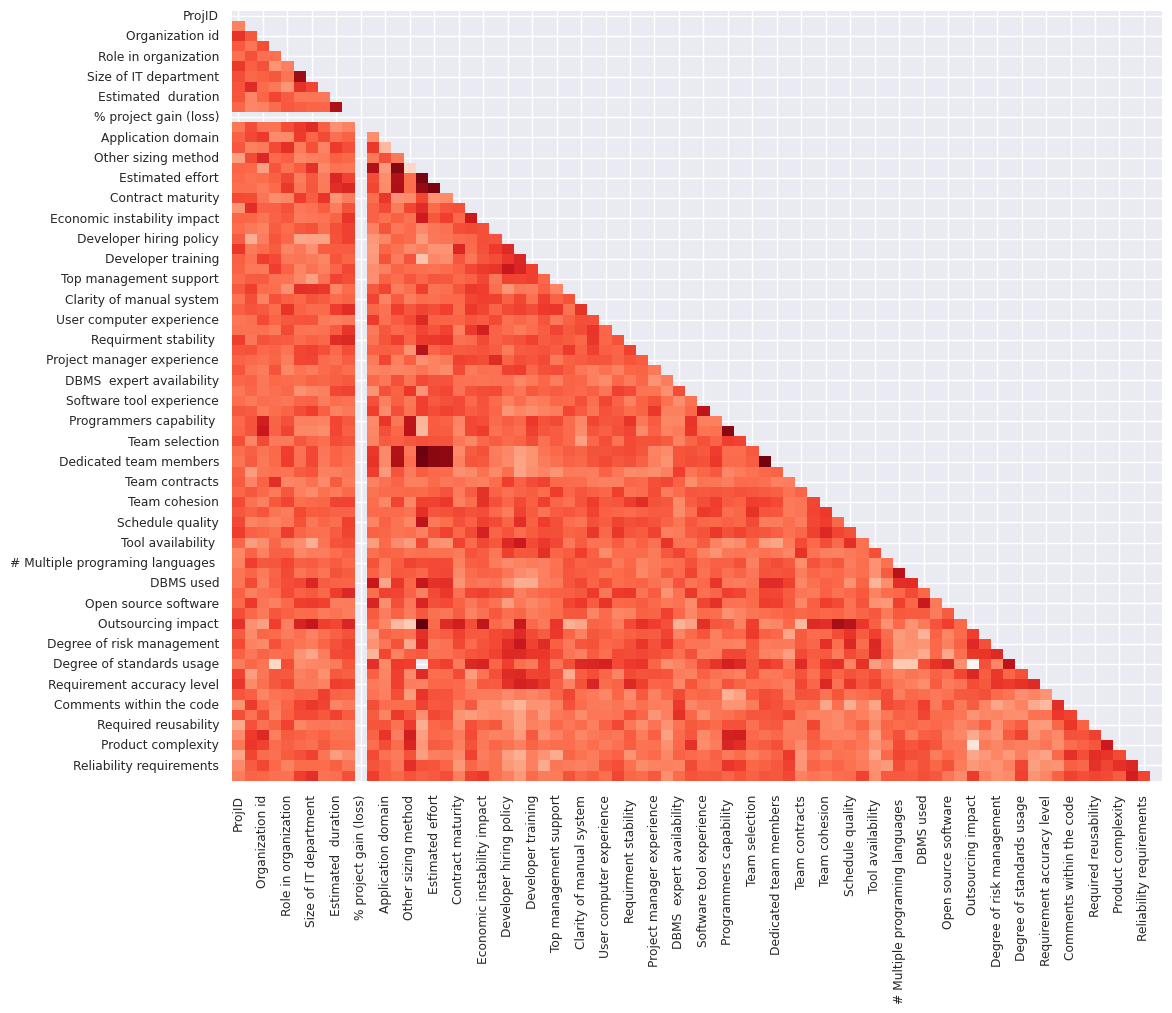

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = seera.corr()

# applying mask
mask = np.triu(np.ones_like(seera.corr()))

sns.set(font_scale=0.8)
sns.heatmap(cor, cmap=plt.cm.Reds, cbar=False, fmt='.1g', mask=mask)
plt.show()

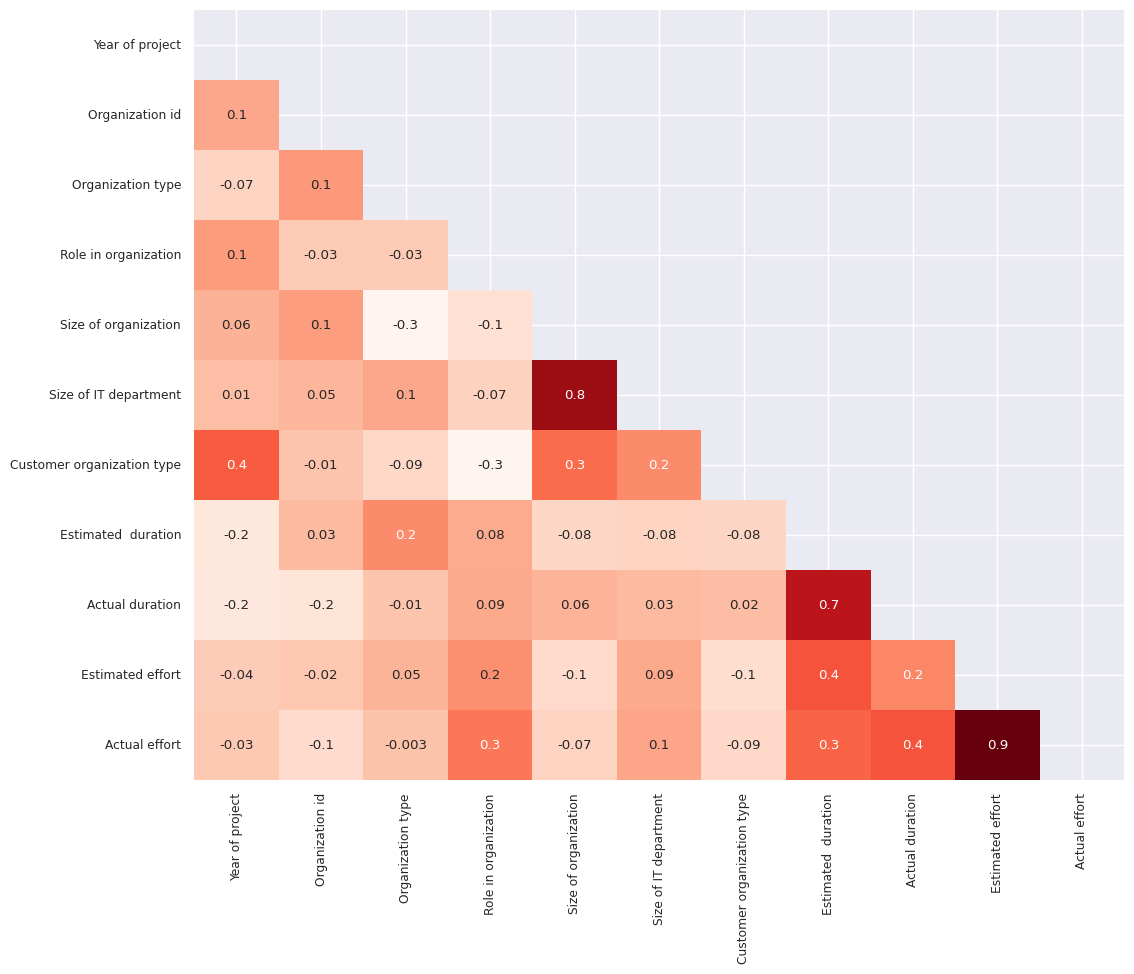

In [ ]:
#Using Pearson Correlation
gen_features = ["Year of project", "Organization id", "Organization type","Role in organization" ,"Size of organization", "Size of IT department","Customer organization type","Estimated  duration","Actual duration", "Estimated effort","Actual effort"]

# applying mask
mask_gen = np.triu(np.ones_like(seera[gen_features].corr()))

plt.figure(figsize=(12,10))
cor = seera[gen_features].corr()
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, cbar=False, fmt='.1g', mask=mask_gen)
plt.show()

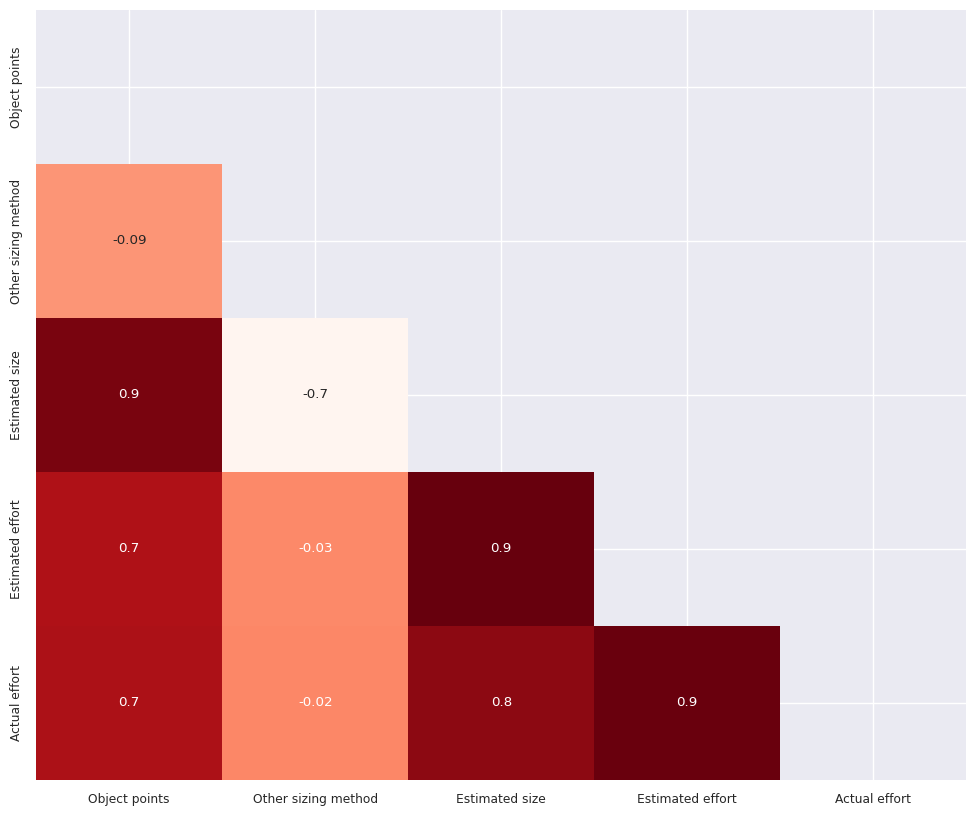

In [ ]:
size_features=["Object points","Other sizing method" ,"Estimated size","Estimated effort","Actual effort"]

# applying mask
mask_size = np.triu(np.ones_like(seera[size_features].corr()))

plt.figure(figsize=(12,10))
cor = seera[size_features].corr()
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, cbar=False, fmt='.1g', mask=mask_size)
plt.show()

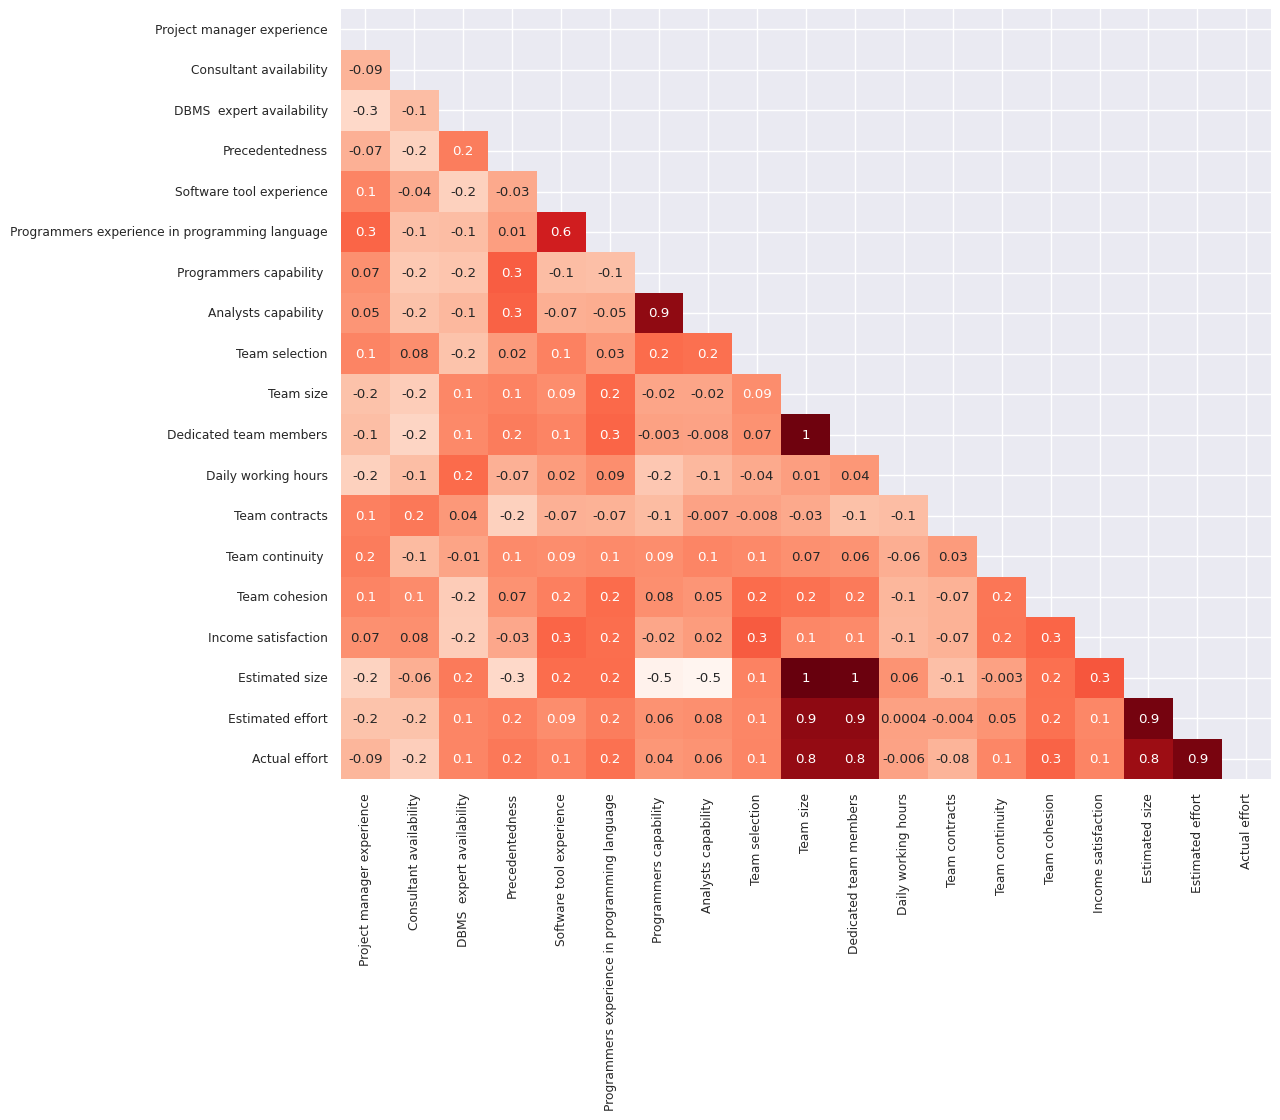

In [ ]:
develop_features = ["Project manager experience","Consultant availability","DBMS  expert availability", "Precedentedness", "Software tool experience", "Programmers experience in programming language", "Programmers capability ", "Analysts capability ", "Team selection", "Team size", "Dedicated team members", "Daily working hours", "Team contracts", "Team continuity ", "Team cohesion", "Income satisfaction","Estimated size","Estimated effort","Actual effort"]

# applying mask
mask_develop = np.triu(np.ones_like(seera[develop_features].corr()))

plt.figure(figsize=(12,10))
cor = seera[develop_features].corr()
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, cbar=False, fmt='.1g', mask=mask_develop)
plt.show()

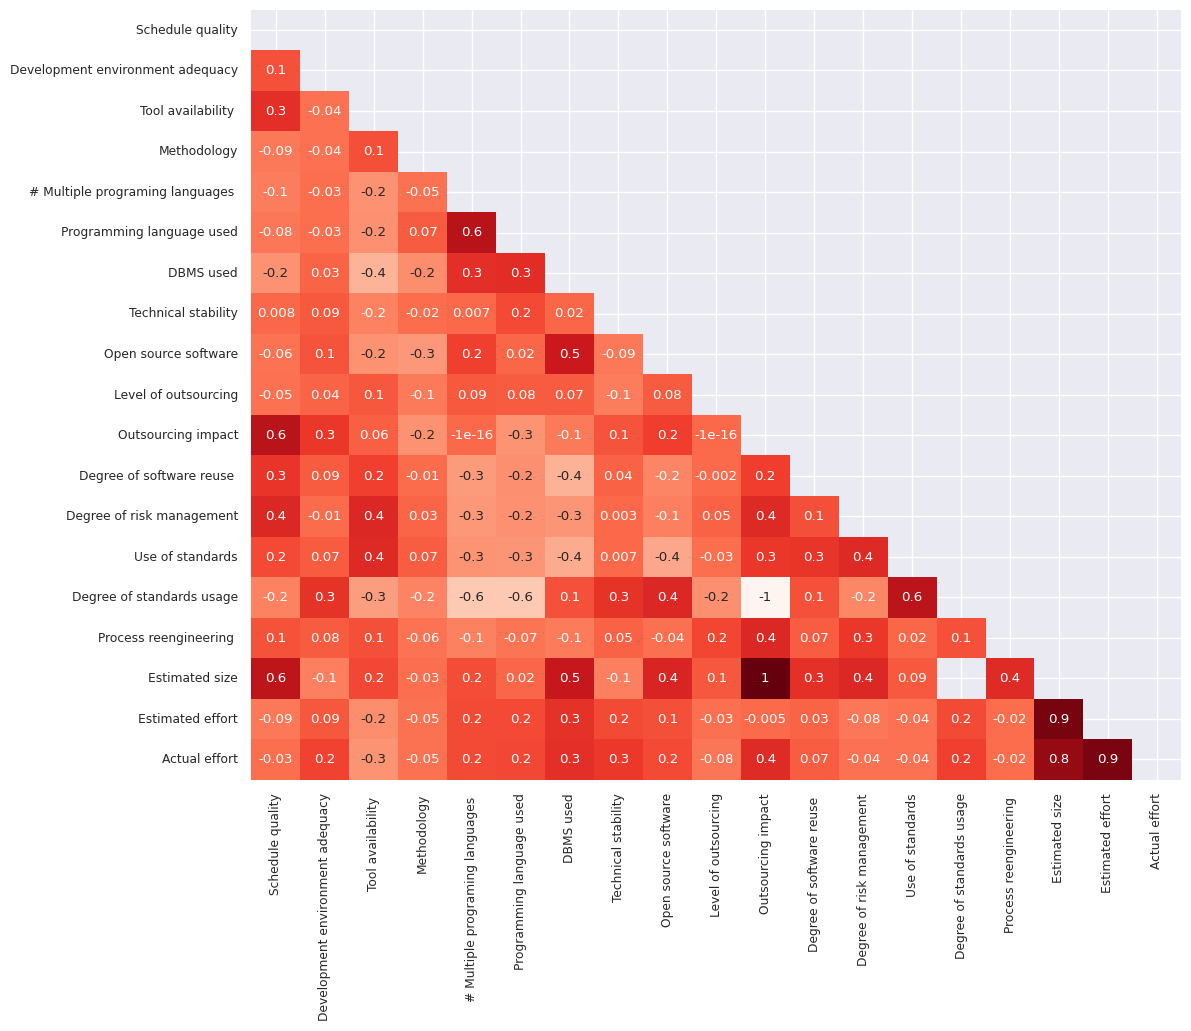

In [ ]:
project_features=[  "Schedule quality",  "Development environment adequacy",  "Tool availability ",  "Methodology",  "# Multiple programing languages ",  "Programming language used",  "DBMS used",  "Technical stability",  "Open source software",  "Level of outsourcing",  "Outsourcing impact",  "Degree of software reuse ",  "Degree of risk management",  "Use of standards",  "Degree of standards usage",  " Process reengineering ", "Estimated size","Estimated effort","Actual effort"]

# applying mask
mask_proj = np.triu(np.ones_like(seera[project_features].corr()))


plt.figure(figsize=(12,10))
cor = seera[project_features].corr()
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, cbar=False, fmt='.1g', mask=mask_proj)
plt.show()



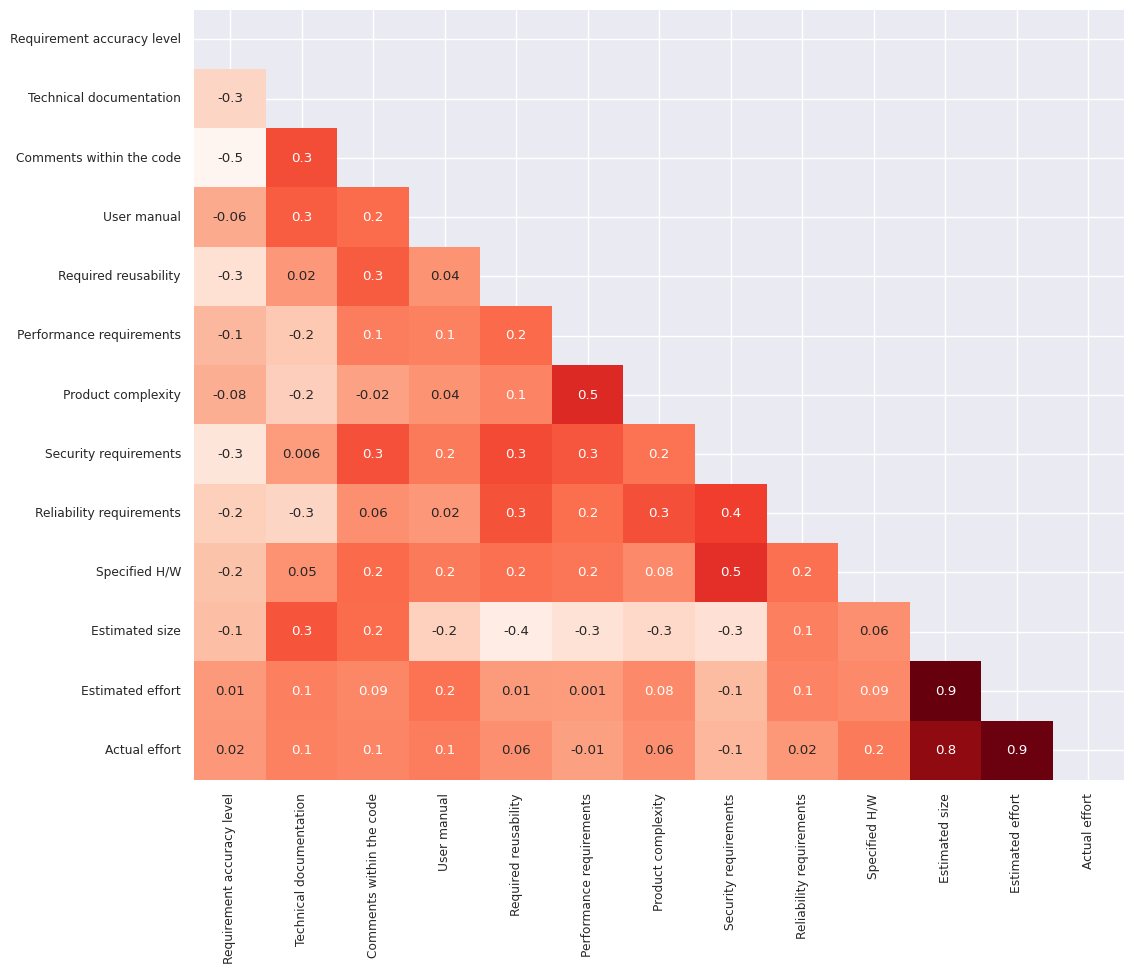

In [ ]:
prod_features = [  "Requirement accuracy level",  "Technical documentation",  "Comments within the code",  "User manual",  "Required reusability",  "Performance requirements",  "Product complexity",  "Security requirements",  "Reliability requirements",  "Specified H/W", "Estimated size","Estimated effort","Actual effort"]

# applying mask
mask_prod = np.triu(np.ones_like(seera[prod_features].corr()))

plt.figure(figsize=(12,10))
cor = seera[prod_features].corr()
sns.set(font_scale=0.8)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, cbar=False, fmt='.1g', mask=mask_prod)
plt.show()




In [ ]:
from sklearn import preprocessing

x = seera.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
seera_scale = pd.DataFrame(x_scaled)

seera_scale.describe()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,0.0,120.000000,120.000000,118.000000,120.000000,13.000000,120.000000,120.000000,120.000000,119.000000,120.000000,118.000000,119.000000,119.000000,118.000000,119.000000,120.000000,120.000000,119.000000,120.000000,120.000000,120.000000,120.000000,120.000000,119.000000,119.000000,120.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,120.000000,120.000000,120.000000,109.000000,119.000000,119.000000,118.000000,119.000000,119.000000,119.000000,120.000000,120.000000,120.000000,120.000000,119.000000,120.000000,119.000000,11.000000,118.000000,119.000000,119.000000,21.000000,117.000000,116.000000,119.000000,118.000000,119.000000,119.000000,119.000000,117.000000,119.000000,118.000000,118.000000
mean,0.500000,0.729169,0.366856,0.507143,0.139286,0.427604,0.306061,0.433854,0.274473,0.207895,NaN,0.172222,0.550000,0.116051,0.310417,0.085519,0.099960,0.109955,0.477381,0.623950,0.159722,0.207627,0.380952,0.609244,0.656780,0.232493,0.668750,0.625000,0.379552,0.430000,0.287500,0.401474,0.433902,0.387083,0.197479,0.731092,0.708333,0.543417,0.308824,0.258403,0.260504,0.243697,0.827731,0.100887,0.088889,0.425833,0.167431,0.114491,0.270108,0.425847,0.252101,0.075630,0.798319,0.213889,0.095833,0.268056,0.385417,0.075630,0.341667,0.920168,0.500000,0.682203,0.718487,0.903361,0.780952,0.274808,0.270115,0.495798,0.477401,0.596639,0.394958,0.212885,0.356125,0.380252,0.497175,0.186441
std,0.292311,0.241066,0.298884,0.194108,0.150984,0.387569,0.375833,0.299059,0.186622,0.187444,NaN,0.329058,0.391673,0.148146,0.204969,0.276413,0.136227,0.159871,0.231683,0.277843,0.208811,0.347926,0.421382,0.269649,0.411891,0.235032,0.282847,0.486153,0.232610,0.207398,0.308578,0.435563,0.289252,0.342311,0.320345,0.361200,0.456435,0.354857,0.326619,0.289163,0.319367,0.315027,0.286984,0.134974,0.134304,0.160092,0.267998,0.201327,0.206928,0.251723,0.312834,0.191323,0.270030,0.213003,0.236357,0.181318,0.338211,0.205558,0.476257,0.260241,0.447214,0.309502,0.414967,0.218598,0.208852,0.297336,0.407452,0.370437,0.303443,0.448630,0.299179,0.309093,0.314790,0.264112,0.389184,0.228719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.605772,0.113636,0.428571,0.000000,0.125000,0.000000,0.125000,0.139241,0.094737,NaN,0.000000,0.166667,0.017720,0.250000,0.000012,0.021831,0.021776,0.285714,0.500000,0.000000,0.000000,0.000000,0.333333,0.500000,0.000000,0.750000,0.000000,0.166667,0.266667,0.000000,0.000000,0.165354,0.110000,0.000000,0.500000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.500000,0.042553,0.020833,0.400000,0.000000,0.000000,0.142857,0.250000,0.000000,0.000000,0.500000,0.000000,0.000000,0.208333,0.250000,0.000000,0.000000,1.000000,0.000000,0.500000,0.500000,1.000000,0.800000,0.110000,0.000000,0.166667,0.333333,0.000000,0.250000,0.000000,0.000000,0.250000,0.083333,0.000000
50%,0.500000,0.807693,0.238636,0.571429,0.142857,0.218750,0.090909,0.562500,0.240506,0.157895,NaN,0.000000,0.666667,0.050797,0.250000,0.000281,0.053136,0.053043,0.428571,0.750000,0.000000,0.000000,0.333333,0.666667,1

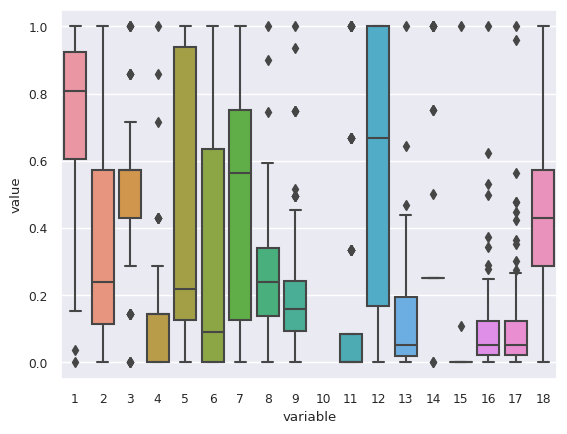

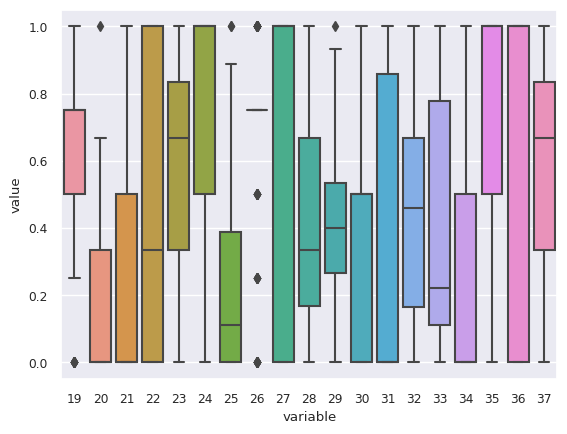

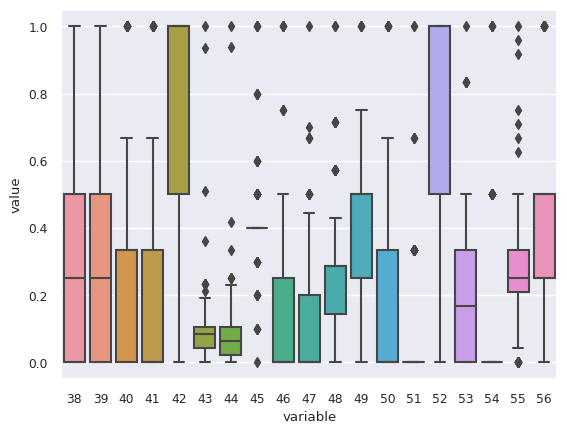

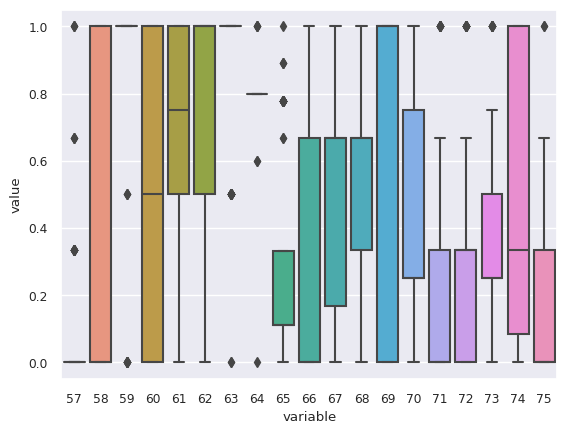

In [ ]:
sns.boxplot(x="variable", y="value", data=pd.melt(seera_scale[range(1,19)]))
plt.show()

sns.boxplot(x="variable", y="value", data=pd.melt(seera_scale[range(19,38)]))
plt.show()

sns.boxplot(x="variable", y="value", data=pd.melt(seera_scale[range(38,57)]))
plt.show()

sns.boxplot(x="variable", y="value", data=pd.melt(seera_scale[range(57,76)]))
plt.show()

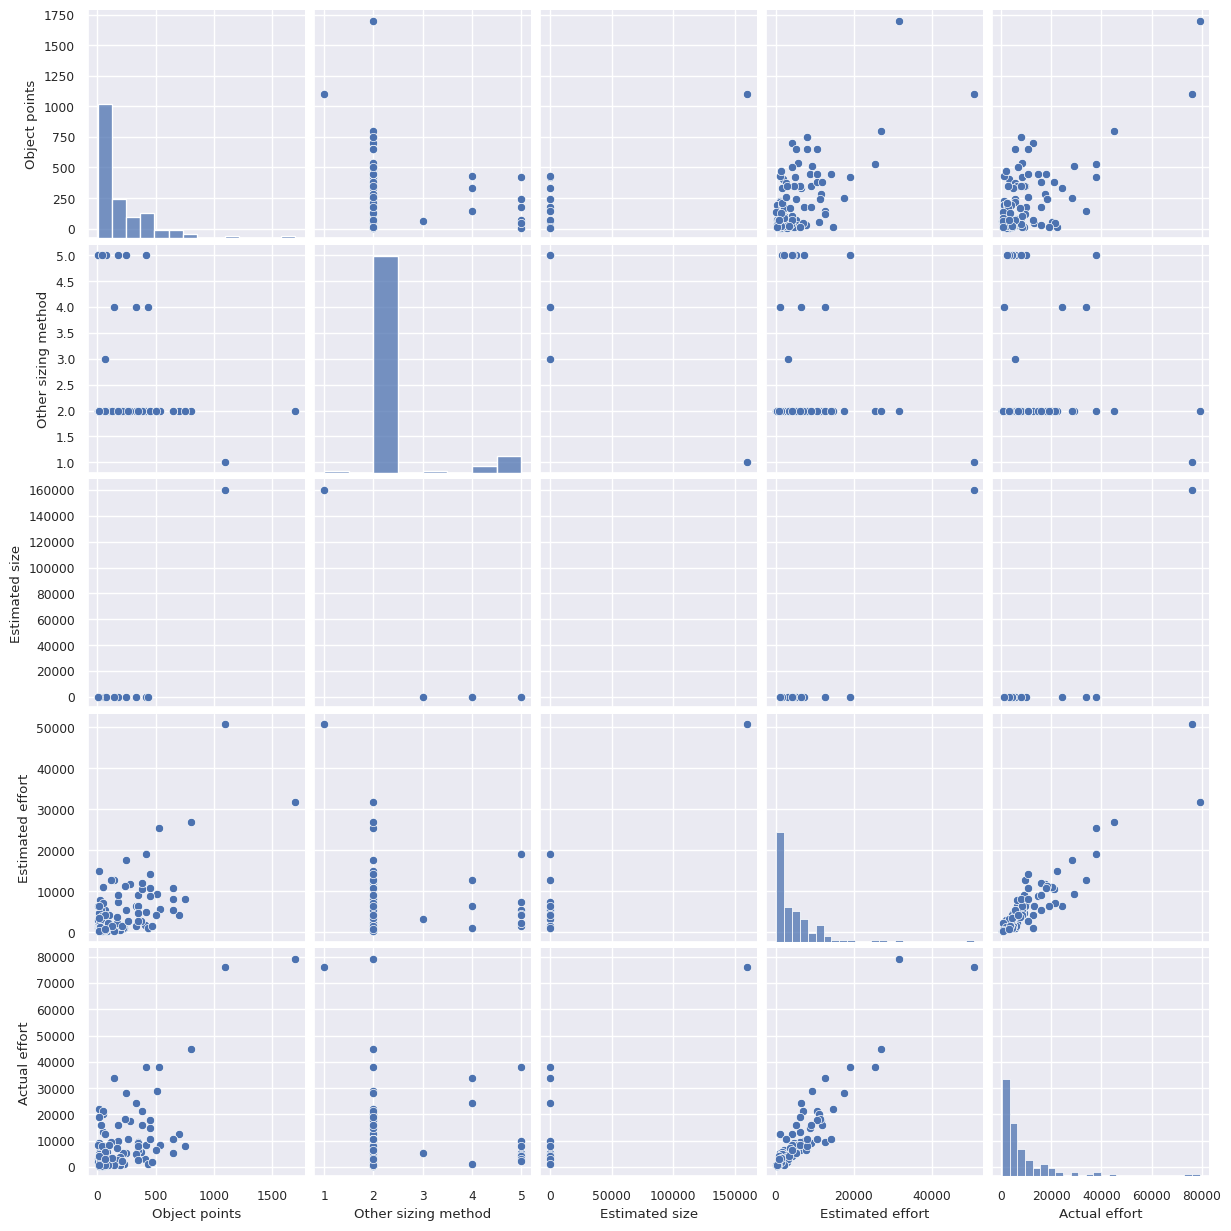

In [ ]:
# Create a scatter plot matrix with histograms on the diagonal
sns.pairplot(seera[size_features])

# Show the plot
plt.show()

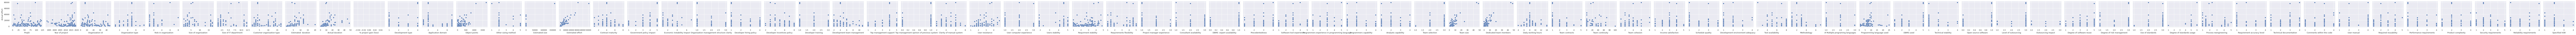

In [ ]:
import seaborn as sns
import pandas as pd

feature_of_interest = 'Actual effort'

# Create the pair plot
sns.pairplot(seera, y_vars=[feature_of_interest], x_vars=seera.columns.drop(feature_of_interest))

# Display the plot
plt.show()

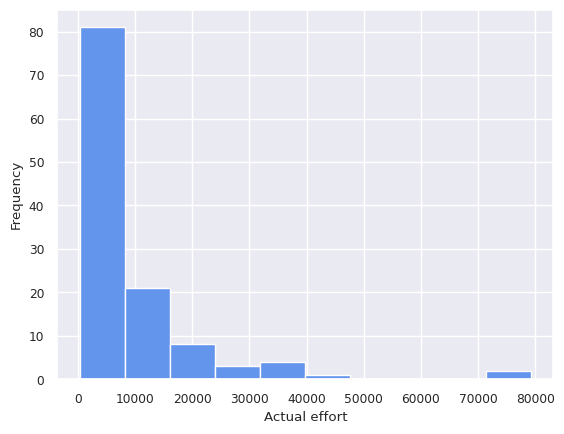

In [ ]:
# Create a histogram

data = seera['Actual effort']

plt.hist(data, bins=10, color='cornflowerblue')

# Add labels and title
plt.xlabel('Actual effort')
plt.ylabel('Frequency')

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

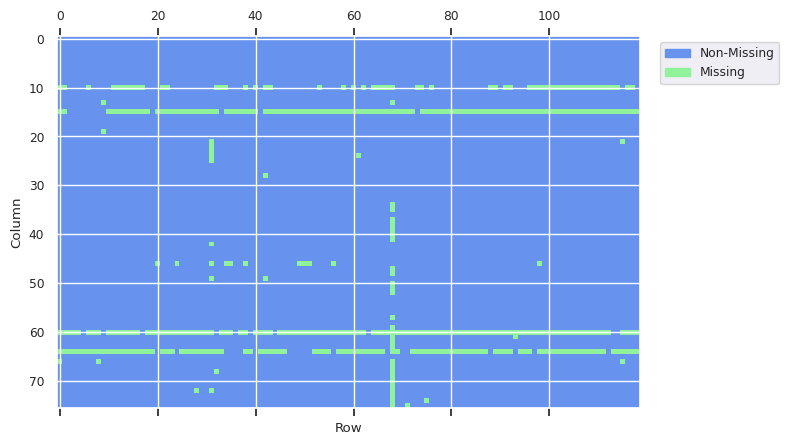

In [ ]:
from matplotlib.colors import ListedColormap

# Replace the old value '?' with NaN
old_value = '?'
new_value = np.nan
seera.replace(old_value, new_value, inplace=True)

# Define custom colormap
cmap = ListedColormap(['#6792ed', '#91f29c'])

# Get the rows with missing values
rows_with_missing_values = seera[seera.isnull().any(axis=1)]

# Transpose the matrix
transpose_data = rows_with_missing_values.isnull().T

# Enlarge the plot
plt.figure(figsize=(10, 6))

# Add color to the image
plt.matshow(transpose_data, cmap=cmap, aspect='auto')

# Add labels to the axes
plt.xlabel('Row')
plt.ylabel('Column')

# Create a legend
legend_labels = ['Non-Missing', 'Missing']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color='#6792ed'),
                  plt.Rectangle((0, 0), 1, 1, color='#91f29c')]

# Position the legend slightly outside the plot
plt.legend(legend_handles, legend_labels, loc='upper right', bbox_to_anchor=(1.25, 1))

# Show the plot
plt.show()